In [ ]:
pip uninstall opencv-python

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? Y
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
pip install opencv-python==3.4.0.14

     |████████████████████████████████| 24.8MB 164kB/s 
ERROR: dopamine-rl 1.0.5 has requirement opencv-python>=3.4.1.15, but you'll have opencv-python 3.4.0.14 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
pip install numpy opencv-python dlib imutils


In [ ]:
#Download the 5-pt alignment file
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5_face_landmarks.dat.bz2

--2020-08-16 07:35:16--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  3.22MB/s    in 1.7s    

2020-08-16 07:35:18 (3.22 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



In [ ]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

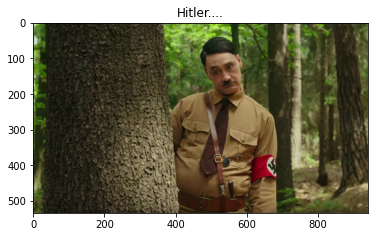

In [ ]:
#Landmark model location
PREDICTOR_PATH = "/content/shape_predictor_5_face_landmarks.dat"

#Get the face detector
faceDetector = dlib.get_frontal_face_detector()
#The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

#Read image
im = cv2.imread("/content/Hitler_face_align.jpg")

plt.imshow(im[:, :, ::-1])
plt.title("Hitler....")
plt.show()

In [ ]:
#Detect landmarks
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

points = np.array(points)

#Convert image to floating point in the range 0 to 1
im = np.float32(im)/255.0

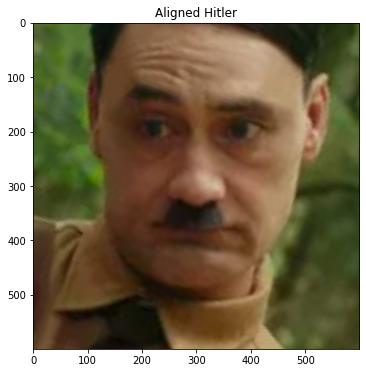

In [ ]:
#Dimensions of output image
h = 600
w = 600

#Normalize the image to output coordinates
imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

imNorm = np.uint8(imNorm*255)

#Display the result
plt.imshow(imNorm[:, :, ::-1])
plt.title("Aligned Hitler")
plt.show()